#                           GRIP - The Spark Foundation

# Data Science And Business Analyst Internship


# Prediction Using Supervised ML

# Author : Shalaka Sonje

# Task 1 

This is a prediction using Supervised Machine Learning.

Predict the percentage of an student based on the number of study hours. 

This is a simple Linear Regression task as it involves just 2 variables. 

What will be predicted score if a student studies for 9.25 hrs/ day? 

# Import Libraries

Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline
print("Libraries Imported Successfully")

Libraries Imported Successfully


# Get the data from online source

In [38]:
#load csv file into pandas dataframe.
url = "http://bit.ly/w-data" 
student = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# Data Exploration

Check the head of students and check out its info() and describe() methods.

In [39]:
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [41]:
student.shape

(25, 2)

In [42]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [43]:
student.dtypes

Hours     float64
Scores      int64
dtype: object

In [44]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [45]:
#checking for any null values

student.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [46]:
#checking the correlation between hours and scores

student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualization

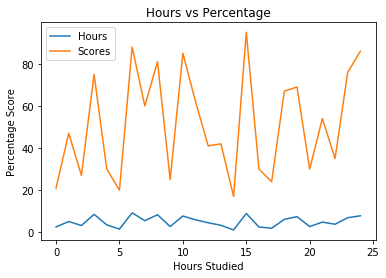

In [47]:
#visualizing with line plot

student.plot(kind = "line")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

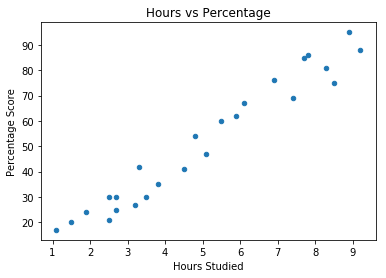

In [48]:
#visualizing using scatter plot

student.plot(kind = 'scatter',x = 'Hours',y = 'Scores' )
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [49]:
y = np.asanyarray(student['Scores'])

In [50]:
x = np.asanyarray(student[['Hours']])

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Training the Model

Now its time to train our model on our training data!

**Create an instance of a LinearRegression() model named lm.**

In [52]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [53]:
lm.fit(x_train,y_train)
print("Training Completed")

Training Completed


In [54]:
print("Coefficients:",lm.coef_)
print("Intercept:",lm.intercept_)

Coefficients: [9.94061514]
Intercept: 1.5079104828268939


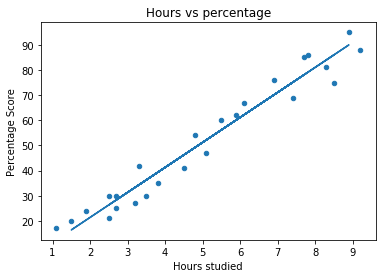

In [55]:
#we can pot the fit line over the data in single linear regression

student.plot(kind = "scatter",x="Hours",y="Scores")
plt.plot(x_train,lm.coef_[0]*x_train+lm.intercept_)
plt.title("Hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()



The above blue line is best fit of the model

# Evaluating the Model

In [56]:
y_pred = lm.predict(x_test)

* Mean Absolute Error : It is a mean of absolute value of errors
* r2 score : It is not the error but it is the metric for accuracy for the model , higher the r2 value higher the accuracy of the model. The best score is 1.

In [58]:
ME = metrics.mean_absolute_error(y_pred,y_test)
R2 = r2_score(y_pred,y_test)
print("Mean Absolute Error :",ME)
print("R2-Score :",R2)

Mean Absolute Error : 4.877039354964476
R2-Score : 0.9753240760240944


In [59]:
#Comparing Actual vs Prediction

df2 = pd.DataFrame({'Actual':y_test,'Prection':y_pred})

In [60]:
df2

,Actual,Prection
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


# Predicting Score with Single Input Value

In [62]:
hour = 9.25
predicted_score = lm.predict([[hour]])

print("Number of Hour :",hour)
print("Predicted Score:",predicted_score[0])

Number of Hour : 9.25
Predicted Score: 93.45860055685799
